In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Output dataframes instead of arrays
set_config(transform_output="pandas")

sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


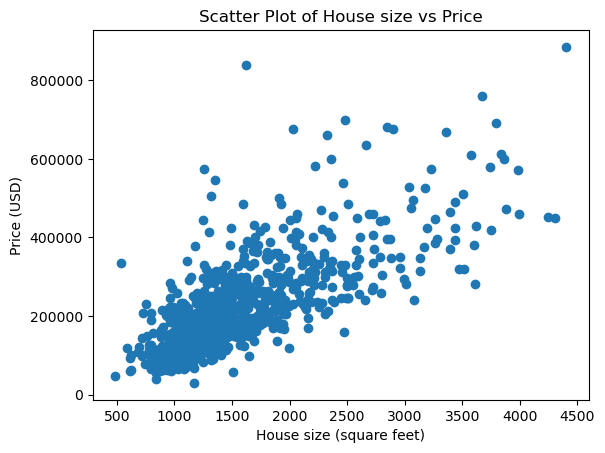

In [ ]:
# Price in US dollars

# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [5]:
# Set seed for reproducibility

np.random.seed(10)

In [6]:
small_sacramento = sacramento.sample(n=30) #taking 30 rows

In [7]:
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627


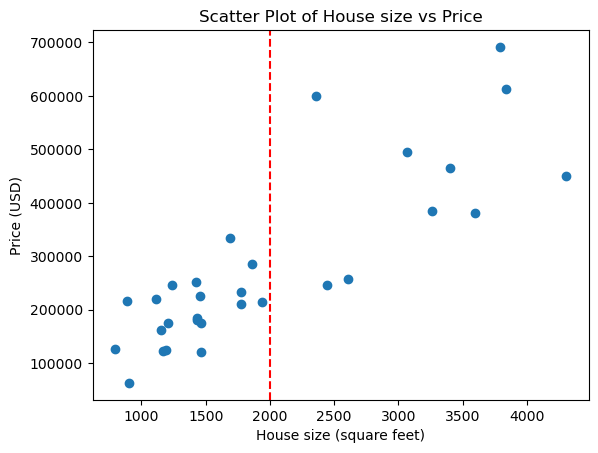

In [8]:
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [9]:
# Calculate absolute difference between our 2000 sq foot home and each house.  New dataset column.

small_sacramento["dist"] = (2000- small_sacramento['sq__ft']).abs()

In [11]:
# Take five nearest neighbors.  #Find the five houses with the smallest distance (closest to 200 square feet).

nearest_neighbors = small_sacramento.nsmallest(5, 'dist')
nearest_neighbors


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
280,3228 I ST,SACRAMENTO,95816,CA,4,3,1939,Residential,Mon May 19 00:00:00 EDT 2008,215000,38.573844,-121.462839,61
197,8986 HAFLINGER WAY,ELK GROVE,95757,CA,3,2,1857,Residential,Fri May 16 00:00:00 EDT 2008,285000,38.397923,-121.450219,143
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276,224
599,5340 BIRK WAY,SACRAMENTO,95835,CA,3,2,1776,Residential,Tue May 20 00:00:00 EDT 2008,234000,38.672495,-121.515251,224
786,8025 PEERLESS AVE,ORANGEVALE,95662,CA,2,1,1690,Residential,Wed May 21 00:00:00 EDT 2008,334150,38.711470,-121.216214,310


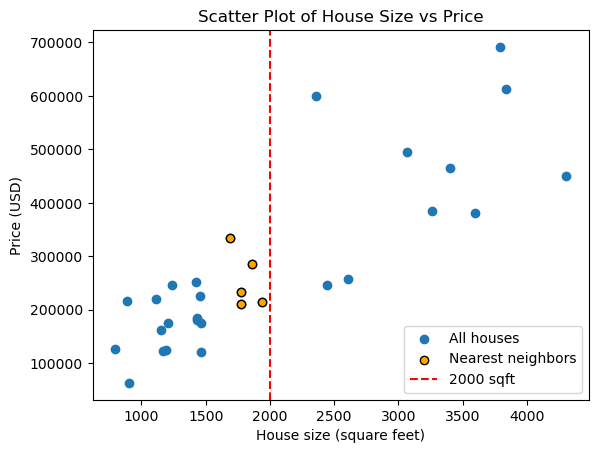

In [12]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [13]:
prediction = nearest_neighbors['price'].mean()
prediction

255630.0

In [ ]:
# Redo analysis with full dataset.

# Train test split. (75% train, 25% test)

# Can specify random state in train_test_split to make code reproducible.  Equivalent to setting a random seed.

# Shuffle = True is default.

sacramento_train, sacramento_test =  train_test_split(sacramento, train_size=0.75, shuffle= True, random_state=42)



In [46]:
# step 2.  Define x, y.  X needs two brackets because it is dataframe, not a vector.  y is only a vector.
X_train = sacramento_train[['sq__ft']]
y_train = sacramento_train['price']

In [47]:
X_train

,sq__ft
443,1161
623,1337
158,2787
69,1264
764,1266
...,...
71,1502
106,2160
270,1856
435,1206


In [21]:
y_train

443    109000
623     90000
158    441000
69     140000
764    198000
        ...  
71     310000
106    290000
270    215000
435    142000
102    190000
Name: price, Length: 609, dtype: int64

In [19]:
# step 3: initialize our model
knn_regressor = KNeighborsRegressor()

In [48]:
# Step 4. Define parameter grid.

param_grid = {"n_neighbors": range(1, 201, 3)} # Choices of range and step size are made based on intuition and desire to have faster calculations.

In [49]:
# Step 5, initialize and fit our gridsearchcv

sacr_grid_search = GridSearchCV(
    estimator=knn_regressor, 
    param_grid=param_grid, 
    cv = 5, 
    scoring = "neg_root_mean_squared_error") # could have been R^2.  

# Need to write "neg", otherwise Grid Search CV to work as intended and prioritize smaller value RMSPE scores.  Otherwise, it tends to priortize higher values.

In [ ]:
# Fit grid search to training data

sacr_grid_search.fit(X_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': range(1, 201, 3)}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,19


In [26]:
results = pd.DataFrame(sacr_grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001697,0.001782,0.001521,0.000800,1,{'n_neighbors': 1},-109655.806526,-120595.130103,-112297.705616,-120818.303875,-112115.342058,-115096.457636,4675.375295,67
1,0.000617,0.000060,0.000649,0.000034,4,{'n_neighbors': 4},-84174.862641,-96956.242253,-99795.018109,-90744.186040,-96708.754264,-93675.812662,5590.476086,49
2,0.000697,0.000167,0.000733,0.000128,7,{'n_neighbors': 7},-82345.022650,-94442.362234,-97121.482754,-87597.243261,-90165.220710,-90334.266322,5182.482900,31
3,0.000523,0.000019,0.000624,0.000036,10,{'n_neighbors': 10},-79985.458885,-94722.834905,-95690.903059,-84342.146484,-88185.414673,-88585.351601,6004.672460,20
4,0.000530,0.000059,0.000593,0.000055,13,{'n_neighbors': 13},-77430.800364,-92812.039395,-96240.816885,-84657.354893,-85242.671132,-87276.736534,6617.179998,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000411,0.000014,0.001162,0.000062,187,{'n_neighbors': 187},-89404.102502,-103889.117510,-110881.591477,-98253.628778,-78552.980467,-96196.284147,11282.645963,62
63,0.000431,0.000032,0.001227,0.000072,190,{'n_neighbors': 190},-89863.315392,-104222.245365,-111093.057167,-98689.116523,-78637.308937,-96501.008677,11318.161791,63
64,0.000404,0.000008,0.001183,0.000023,193,{'n_neighbors': 193},-90257.326655,-104471.730296,-111383.626131,-99098.910125,-78655.460986,-96773.410839,11391.662919,64
65,0.000409,0.000021,0.001219,0.000028,196,{'n_neighbors': 196},-90618.127253,-104552.352275,-111682.970126,-99529.902613,-78741.616470,-97024.993747,11429.101358,65


In [27]:
# Take absolute of error values to make them non negative

results['mean_test_score'] = results['mean_test_score'].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001697,0.001782,0.001521,0.000800,1,{'n_neighbors': 1},-109655.806526,-120595.130103,-112297.705616,-120818.303875,-112115.342058,115096.457636,4675.375295,67
1,0.000617,0.000060,0.000649,0.000034,4,{'n_neighbors': 4},-84174.862641,-96956.242253,-99795.018109,-90744.186040,-96708.754264,93675.812662,5590.476086,49
2,0.000697,0.000167,0.000733,0.000128,7,{'n_neighbors': 7},-82345.022650,-94442.362234,-97121.482754,-87597.243261,-90165.220710,90334.266322,5182.482900,31
3,0.000523,0.000019,0.000624,0.000036,10,{'n_neighbors': 10},-79985.458885,-94722.834905,-95690.903059,-84342.146484,-88185.414673,88585.351601,6004.672460,20
4,0.000530,0.000059,0.000593,0.000055,13,{'n_neighbors': 13},-77430.800364,-92812.039395,-96240.816885,-84657.354893,-85242.671132,87276.736534,6617.179998,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000411,0.000014,0.001162,0.000062,187,{'n_neighbors': 187},-89404.102502,-103889.117510,-110881.591477,-98253.628778,-78552.980467,96196.284147,11282.645963,62
63,0.000431,0.000032,0.001227,0.000072,190,{'n_neighbors': 190},-89863.315392,-104222.245365,-111093.057167,-98689.116523,-78637.308937,96501.008677,11318.161791,63
64,0.000404,0.000008,0.001183,0.000023,193,{'n_neighbors': 193},-90257.326655,-104471.730296,-111383.626131,-99098.910125,-78655.460986,96773.410839,11391.662919,64
65,0.000409,0.000021,0.001219,0.000028,196,{'n_neighbors': 196},-90618.127253,-104552.352275,-111682.970126,-99529.902613,-78741.616470,97024.993747,11429.101358,65


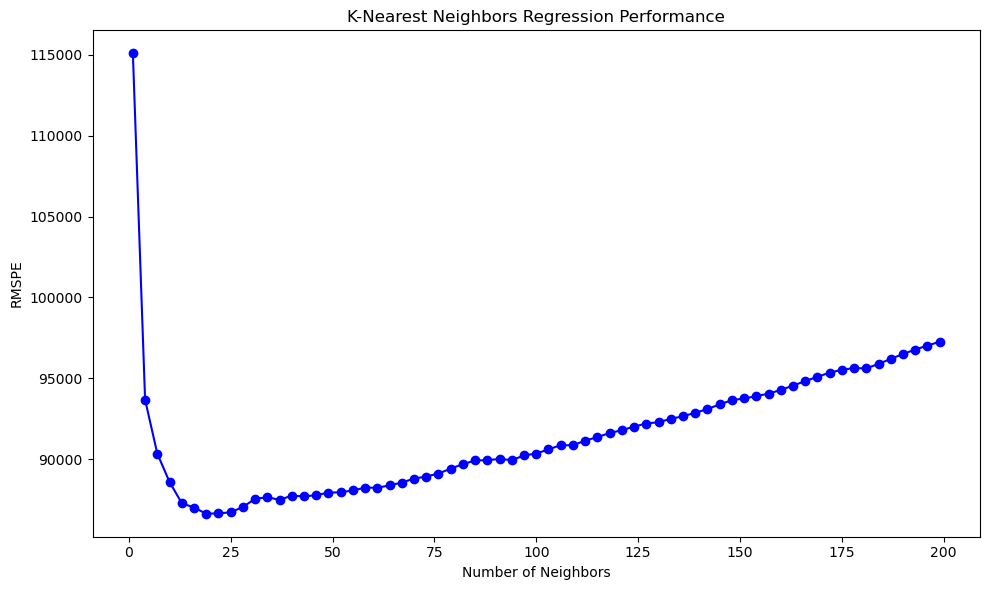

In [42]:

#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue') # "o" flag makes data point circles.  Default is x's.

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSPE')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [29]:
sacr_grid_search.best_params_

{'n_neighbors': 19}

In [30]:
best_k = sacr_grid_search.best_params_['n_neighbors']
best_k

19

In [36]:
# object maintains best value of k and keeps it for whole training set.  Can go straight to test set.

sacramento_test["predicted"] = sacr_grid_search.predict(sacramento_test[["sq__ft"]])

In [37]:
# Calculate RMSPE

rmspe = mean_squared_error(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test['predicted']
)**0.5
rmspe

74240.70943389146

In [38]:
r2 = r2_score(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test['predicted']
)
r2

0.49526130381694955

/opt/miniconda3/envs/dsi_participant_1/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


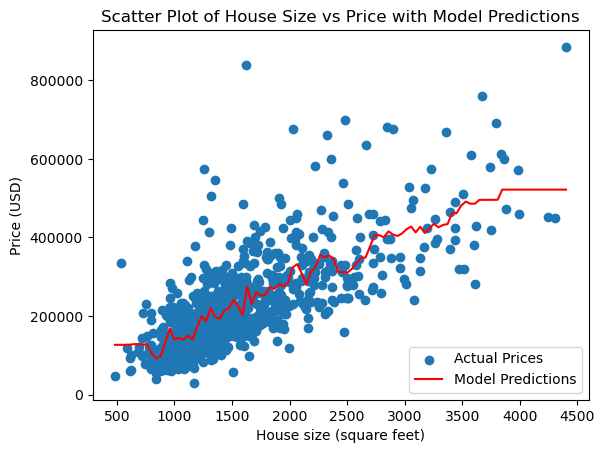

In [39]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_grid_search.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show()